# Abstract

This notebook compares the candidate mechanism perturbation amplitude at multiple disease stages in Alzheimer's Disease experiments, using the PyBEL web service

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import andrews_curves, parallel_coordinates
from sklearn.cluster import KMeans

In [2]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
np.random.seed(5)

In [4]:
early = 'http://pybel.scai.fraunhofer.de/api/analysis/3/download'
moderate = 'http://pybel.scai.fraunhofer.de/api/analysis/4/download'
severe = 'http://pybel.scai.fraunhofer.de/api/analysis/5/download'

In [5]:
early_df = pd.read_csv(early).rename(index=str, columns={"avg": "EarlyAvg"})
early_df.head()

,Namespace,Name,EarlyAvg,stddev,normality,median,neighbors,subgraph_size
0,GOBP,microglial cell activation involved in immune ...,0.000000,0.000000e+00,6.047757e-01,0.000000,4,5
1,GOBP,T cell activation,NaN,NaN,NaN,NaN,0,0
2,GOBP,apoptotic signaling pathway,NaN,NaN,NaN,NaN,0,1
3,GOBP,insulin receptor signaling pathway,NaN,NaN,NaN,NaN,0,1
4,MESHPP,Neurogenesis,0.226581,1.110223e-16,6.212907e-27,0.226581,1,4


In [6]:
moderate_df = pd.read_csv(moderate).rename(index=str, columns={"avg": "ModerateAvg"})
moderate_df.head()

,Namespace,Name,ModerateAvg,stddev,normality,median,neighbors,subgraph_size
0,GOBP,microglial cell activation involved in immune ...,0.000000,0.0,0.604776,0.000000,4,5
1,GOBP,T cell activation,NaN,NaN,NaN,NaN,0,0
2,GOBP,apoptotic signaling pathway,NaN,NaN,NaN,NaN,0,1
3,GOBP,insulin receptor signaling pathway,NaN,NaN,NaN,NaN,0,1
4,MESHPP,Neurogenesis,0.137767,0.0,0.604776,0.137767,1,4


In [7]:
severe_df = pd.read_csv(severe).rename(index=str, columns={"avg": "SevereAvg"})
severe_df.head()

,Namespace,Name,SevereAvg,stddev,normality,median,neighbors,subgraph_size
0,GOBP,microglial cell activation involved in immune ...,0.000000,0.000000e+00,6.047757e-01,0.000000,4,5
1,GOBP,T cell activation,NaN,NaN,NaN,NaN,0,0
2,GOBP,apoptotic signaling pathway,NaN,NaN,NaN,NaN,0,1
3,GOBP,insulin receptor signaling pathway,NaN,NaN,NaN,NaN,0,1
4,MESHPP,Neurogenesis,-0.186822,2.775558e-17,6.212907e-27,-0.186822,1,4


Concatenate the average scores into a single data frame

In [8]:
df = pd.concat([
    early_df[['Namespace', 'Name','EarlyAvg']], 
    moderate_df['ModerateAvg'], 
    severe_df['SevereAvg']
], axis=1)

df = df[df['EarlyAvg'].notnull()]
df = df[df['EarlyAvg'] != 0]

cols = ['EarlyAvg', 'ModerateAvg', 'SevereAvg']

df.head()

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg
4,MESHPP,Neurogenesis,0.226581,0.137767,-0.186822
7,PMIBP,ST6GAL1 secretion,-0.085421,0.066005,-0.001897
22,GOBP,regulation of neuronal synaptic plasticity,-0.082593,-1.023411,-0.390744
25,ADO,loss_of_synapses,0.041853,-0.022752,-0.033649
42,PMIBP,spatial memory,-0.041853,0.022752,0.033649


Use the pearson correlation over the time series

In [9]:
corr_df = df[cols].T.corr()

Clustering reveals 3 general patterns of biological processes throughout the progressions.

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


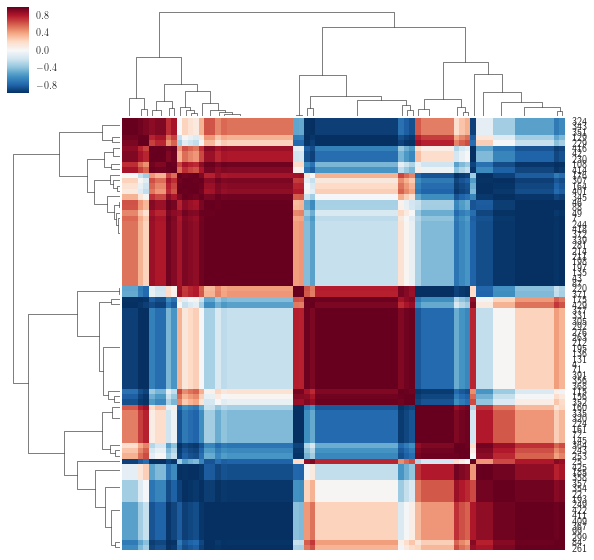

In [22]:
cg = sns.clustermap(corr_df, xticklabels=False)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

Assign classes based on a simple k-means clustering.

In [11]:
km = KMeans(n_clusters=5)
km.fit(df[cols])

df['label'] = km.labels_

Parallel coordinates immediately reveal the groups of patterns in relation of each mechanism to the disease progressions. Andrews curves use fourier analysis to reveal further patterns in the frequency domain.

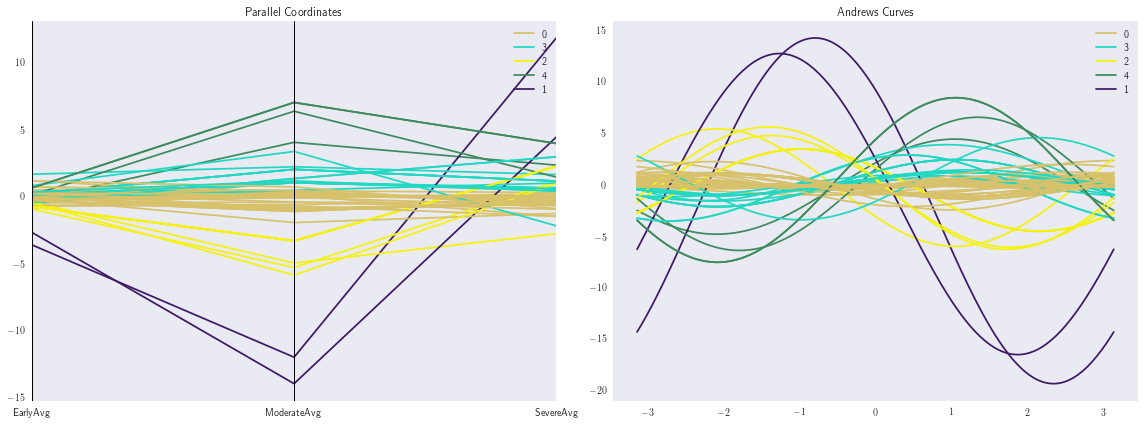

In [26]:
fix, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].set_title('Parallel Coordinates')
parallel_coordinates(df[cols + ['label']], 'label', ax=axes[0])

axes[1].set_title('Andrews Curves')
andrews_curves(df[cols + ['label']], 'label', ax=axes[1])

plt.tight_layout()
plt.show()

Class `0` contains candidate mechanisms whose CMPA scores are neither significant nor do they change much over time. The other class members are enumerated below.

In [15]:
df[df['label'] == 2]

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg,label
72,GOBP,"negative regulation of synaptic transmission, ...",-0.787500,-3.339716,2.220964,2
145,GOBP,"synaptic transmission, cholinergic",-0.787500,-3.339716,2.220964,2
161,GOBP,zinc ion homeostasis,-0.787500,-3.339716,2.220964,2
224,GOBP,glucocorticoid receptor signaling pathway,-0.787500,-3.339716,2.220964,2
243,GOBP,blood circulation,-0.962692,-5.340820,1.095998,2
249,GOBP,cognition,-0.437980,-5.002758,-2.812416,2
320,GOBP,cAMP-mediated signaling,-0.787500,-3.339716,2.220964,2
335,GOBP,leukocyte mediated immunity,-0.787500,-3.339716,2.220964,2
364,GOBP,mitochondria-nucleus signaling pathway,-0.513527,-5.902474,0.929334,2


In [16]:
df[df['label'] == 3]

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg,label
43,GOBP,leukotriene production involved in inflammator...,0.087596,1.000552,0.562483,3
87,PMIBP,Calcium dysfunction,0.087596,1.000552,0.562483,3
108,GOBP,chronic inflammatory response,-0.574469,1.048320,0.630570,3
135,GOBP,vasoconstriction,0.175192,2.001103,1.124966,3
176,MESHPP,Insulin Resistance,1.637310,2.196536,1.613563,3
197,GOBP,response to oxidative stress,0.087596,1.000552,0.562483,3
198,GOBP,negative regulation of calcium-mediated signaling,0.175192,2.001103,1.124966,3
211,GOBP,beta-amyloid formation,0.087596,1.000552,0.562483,3
214,GOBP,response to reactive oxygen species,0.087596,1.000552,0.562483,3
281,GOBP,negative regulation of neuron projection regen...,0.175192,2.001103,1.124966,3


In [17]:
df[df['label'] == 4]

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg,label
88,GOBP,neuron apoptotic process,-0.304555,4.023010,2.318156,4
244,GOBP,inflammatory response,0.613172,7.003861,3.937383,4
307,GOBP,neuron death,0.080705,6.345117,1.427998,4
418,GOBP,cell death,0.613172,7.003861,3.937383,4


# Conclusions

Patients can be measured at multiple time points to be temporally aligned based on these patterns and possibly identify a disease subtype.